In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

This notebook gives by step breakdown analysis of this sales dataset. It includes insights gained and business actions suggested for the success of the business.

In [4]:
# Reading of the dataset
df = pd.read_csv("data.csv")
df.head()

,Order No,Order Date,Customer Name,Address,City,State,Customer Type,Account Manager,Order Priority,Product Name,...,Cost Price,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total
0,4293-1,02-09-2014,Vivek Sundaresam,"152 Bunnerong Road,Eastgardens",Sydney,NSW,Small Business,Tina Carlton,Critical,UGen Ultra Professional Cordless Optical Suite,...,$156.50,$300.97,$144.47,23.0,"$4,533.52",2%,$194.83,"$4,757.22",$7.18,"$4,291.55"
1,5001-1,24-10-2015,Shahid Hopkins,"438 Victoria Avenue,Chatswood",Sydney,NSW,Corporate,Natasha Song,Medium,Bagged Rubber Bands,...,$0.24,$1.26,$1.02,8.0,$45.20,3%,$0.00,$45.90,$0.70,$46.91
2,5004-1,13-03-2014,Dennis Pardue,"412 Brunswick St,Fitzroy",Melbourne,VIC,Consumer,Connor Betts,Not Specified,TechSavi Cordless Navigator Duo,...,$42.11,$80.98,$38.87,45.0,$873.32,4%,$72.23,$837.57,$7.18,$82.58
3,5009-1,18-02-2013,Sean Wendt,"145 Ramsay St,Haberfield",Sydney,NSW,Small Business,Phoebe Gour,Critical,Artisan Printable Repositionable Plastic Tabs,...,$5.33,$8.60,$3.27,16.0,$73.52,1%,$4.35,$740.67,$6.19,$730.92
4,5010-1,13-09-2014,Christina Vanderzanden,"188 Pitt Street,Sydney",Sydney,NSW,Small Business,Tina Carlton,Not Specified,Pizazz Drawing Pencil Set,...,$1.53,$2.78,$1.25,49.0,$138.46,7%,$5.95,$123.77,$1.34,$125.97


In [5]:
df.describe()
df.isnull().sum()

Order No             0
Order Date           0
Customer Name        0
Address              1
City                 0
State                0
Customer Type        0
Account Manager      0
Order Priority       0
Product Name         0
Product Category     0
Product Container    0
Ship Mode            0
Ship Date            0
Cost Price           0
Retail Price         0
Profit Margin        0
Order Quantity       1
Sub Total            0
Discount %           0
Discount $           0
Order Total          0
Shipping Cost        0
Total                0
dtype: int64

In [6]:
# Converting the "Order Date" column to date data type:
for col in df.columns:
    if 'Date' in col:
        df[col] = pd.to_datetime(df[col], format='%d-%m-%Y')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order No           5000 non-null   object        
 1   Order Date         5000 non-null   datetime64[ns]
 2   Customer Name      5000 non-null   object        
 3   Address            4999 non-null   object        
 4   City               5000 non-null   object        
 5   State              5000 non-null   object        
 6   Customer Type      5000 non-null   object        
 7   Account Manager    5000 non-null   object        
 8   Order Priority     5000 non-null   object        
 9   Product Name       5000 non-null   object        
 10  Product Category   5000 non-null   object        
 11  Product Container  5000 non-null   object        
 12  Ship Mode          5000 non-null   object        
 13  Ship Date          5000 non-null   datetime64[ns]
 14  Cost Pri

In [7]:
df.isnull().sum()

Order No             0
Order Date           0
Customer Name        0
Address              1
City                 0
State                0
Customer Type        0
Account Manager      0
Order Priority       0
Product Name         0
Product Category     0
Product Container    0
Ship Mode            0
Ship Date            0
Cost Price           0
Retail Price         0
Profit Margin        0
Order Quantity       1
Sub Total            0
Discount %           0
Discount $           0
Order Total          0
Shipping Cost        0
Total                0
dtype: int64

In [8]:
df['Revenue'] = df['Order Total']

In [9]:
df[['Revenue','Retail Price','Discount %','Order Quantity']].describe()

,Order Quantity
count,4999.000000
mean,26.483097
std,14.391863
min,1.000000
25%,13.000000
50%,27.000000
75%,39.000000
max,50.000000


## EARLY INSIGHTS
- From the mean (26 units), this tells me that the purchases are not made by individuals, but by businesses. It is a sign of bulk purchases, which indicates a B2B transaction.
- A median of 50 (50%) confirms this bulk behavior.
- The standard deviation of 14 is big, indicating that the distribution of order quantity is not evenly spread. Not all customers buy in large quantities.
- The big difference between min(1 unit) and max(50 units) indicates that some customers buy very small quantities while others buy in very large quantities.

In [10]:
# Checking revenue + discount behaviour
df[['Revenue','Retail Price', 'Discount %']].describe()

,Revenue,Retail Price,Discount %
count,5000,5000,5000
unique,3168,139,11
top,$84.97,$2.88,3%
freq,29,188,653


- The occurrence of 3168 unique revenues indicates that there were different orders for different products. Most orders generate different revenue amounts.
- There are varying discounts and custom quantities.
- Revenue is fragmented, and no single price point dominates.
- The most frequent retail price is $2.88, and it occurs 188 times. This suggests that a single, low-priced product is driving a significant number of orders. This could suggest a volume-driven revenue strategy rather than a premium pricing approach.
- There are only 11 unique discount levels. The 3% Discount occurs 653 times.
- This could suggest that a low percent discount drives revenue and should be tested in future sales. Several low discounts (e.g., 5%, 4%, 3%) should be tested on high volume products and measure the impact on order quantity.

In [11]:
#Removing the dollars from the money columns and converting to float:
money_cols = ['Retail Price', 'Cost Price', 'Sub Total', 'Discount $', 'Revenue', 'Shipping Cost', 'Total', 'Revenue']

for col in money_cols:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)


In [12]:
df[money_cols].head()

,Retail Price,Cost Price,Sub Total,Discount $,Revenue,Shipping Cost,Total,Revenue
0,300.97,156.50,4533.52,194.83,4757.22,7.18,4291.55,4757.22
1,1.26,0.24,45.20,0.00,45.90,0.70,46.91,45.90
2,80.98,42.11,873.32,72.23,837.57,7.18,82.58,837.57
3,8.60,5.33,73.52,4.35,740.67,6.19,730.92,740.67
4,2.78,1.53,138.46,5.95,123.77,1.34,125.97,123.77


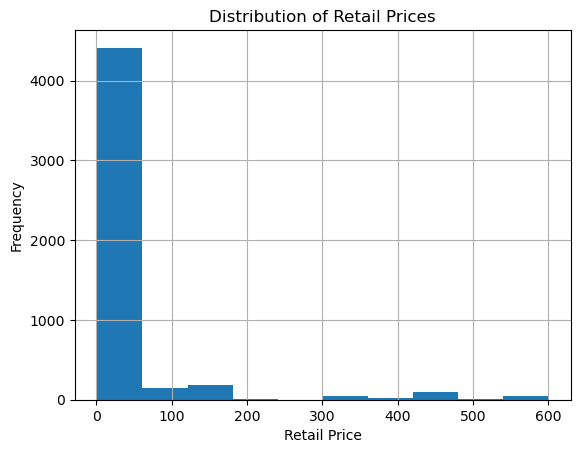

In [13]:
# Visualizing the first driver; Retail Price:
import matplotlib.pyplot as plt

df['Retail Price'].hist(bins = 10)
plt.xlabel('Retail Price')
plt.ylabel('Frequency')
plt.title('Distribution of Retail Prices')
plt.show()

The histogram gives the following information:
1. Low-priced ($0 - $40) SKUs are driving more sales than medium to large price SKUs.
2. A tiny number of items cost $200 to $600. They are rarely patronized.
Next, we make further investigations to find out which low-priced products are driving sales.

In [14]:
df['Product Name'].value_counts().head(10)

Product Name
Artisan 474 Labels                         136
Smiths General Use 3-Ring Binders          126
Artisan 479 Labels                         112
Apex Preferred Stainless Steel Scissors    112
Artisan 481 Labels                         107
Alto Memo Cubes                            107
Smiths Metal Binder Clips                   96
Cando PC940 Copier                          94
Artisan Hanging File Binders                93
Pizazz Drawing Pencil Set                   89
Name: count, dtype: int64

The top 10 most purchased products are low-cost office supplies (labels, binders, scissors). This indicates that customers buy high-volume, low-cost SKUs.
This is an indication that the business relies heavily on these products and a consistent inventory supply of low-cost SKUs.

### Business Actions:
- Promotion of mid-tier products with targeted discounts.
- Use high-frequency products as lead magnets to upsell during checkouts.
- Introduce product bundles like an office kit to increase average order value.
Now, let us investigate which product(s) drive revenue and not just products that sell the most.

In [15]:
product_revenue = df.groupby('Product Name')['Revenue'].sum().sort_values(ascending = False)
product_revenue

Product Name
Cando PC940 Copier                                703009.37
HFX LaserJet 3310 Copier                          469032.70
Adesso Programmable 142-Key Keyboard              241437.89
UGen Ultra Professional Cordless Optical Suite    201592.85
UGen Ultra Cordless Optical Suite                 136656.64
                                                    ...    
Artisan 419 Labels                                    21.43
OCColor Flip                                          20.75
Artisan 4877 Labels                                   14.49
Astor Doster Colors                                   10.10
Alliance Rubber Bands                                  9.58
Name: Revenue, Length: 257, dtype: float64

High-priced items drive the majority of revenue, rather than low-priced, frequently purchased items like office supplies.
High-cost items draw high revenue, though their frequency of sales is low.

### Why this matters
- The company is relying solely on a few high-cost items that drive the main revenue.
- If the sales of these items fall, revenue collapses. Meanwhile, a lot of the workforce is assigned to low-cost orders.

## Business action
- Priority should be given to high-cost SKUs. Marketing, inventory availability, and customer retention should be looked into.
- Use low-cost items as bundle tools to upsell high-value items.
- The focus of the company should be shifted from selling low-cost items in high volumes to selling high-cost items that generate the most profit.

Now, let's find out how much of the total revenue the top 5 products contribute.

In [16]:
total_revenue = df['Revenue'].sum()
top5_revenue = product_revenue.head(5).sum()
percentage = (top5_revenue/total_revenue) * 100
percentage

45.989223391542005

About 46% of the revenue is coming from just 2% of the products. This shows heavy revenue concentration, and it has major business complications.

## Why this matters:
- The business is heavily dependent on a very small portion of its product line.
- This may lead to great loss if these products no longer sell.
- Meanwhile, hundreds of small-cost items are moving, thereby making the business put focus and resources on them.

## Business actions
- High-cost items should be given a higher priority since they are the revenue drivers of the business.
- More marketing strategies should be given to these items, and customers' buying patterns should be analyzed for these products.
- Evaluate low performers and consider consolidation, bundling, or discontinuing to reduce operational load.
- Mid-tier products should be introduced so the business does not depend solely on a handful of top-tier products.

# REGIONAL ANALYSIS

In [17]:
df.groupby('State')['Revenue'].sum().sort_values(ascending = False).head(10)

State
NSW    2672545.42
VIC    1136454.43
Name: Revenue, dtype: float64

In [18]:
state_rev = df.groupby('State')['Revenue'].sum()
(state_rev['NSW']/state_rev.sum()) * 100

70.16396758324892

## Business insights
About 70% of revenue is generated from NSW, indicating extreme geographic concentration.
This means that the revenue of the business is mostly from NSW, which has the potential to cause the fall of the business when this region faces any regional economic slowdown.
Though VIC is underperforming, it does show that we are missing opportunities there.

## Business action:
- The operations in NSW should be strengthened to maintain revenue hold
- A strong marketing and sales campaign should be started at VIC to close the performance gap.
- Let there be an investigation of the products that move in VIC as compared to NSW to identify regional opportunities.


# SEASONALITY ANALYSIS

In [19]:
df.groupby('City')['Revenue'].sum().sort_values(ascending = False).head(10)

City
Sydney       2672545.42
Melbourne    1136454.43
Name: Revenue, dtype: float64

<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='Month'>

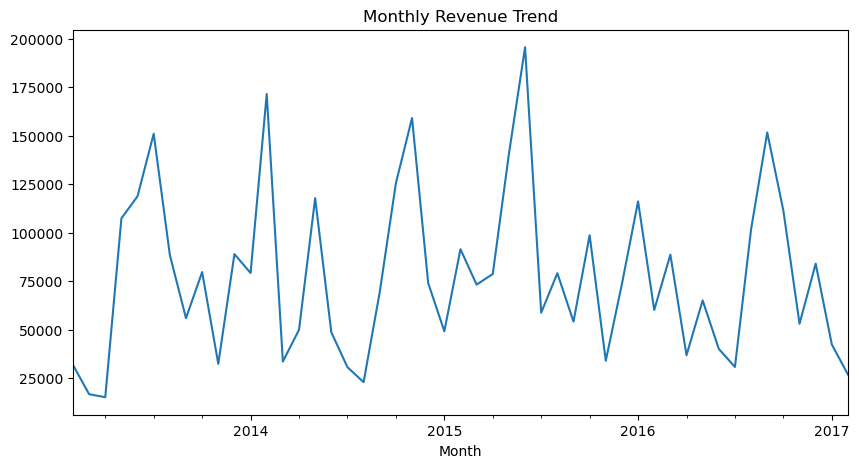

In [20]:
df['Month']=df['Order Date'].dt.to_period('M')
df.groupby('Month')['Revenue'].sum().plot(kind='line', figsize=(10,5), title = 'Monthly Revenue Trend')

## INSIGHTS
- Some months hit from $90K - $150k in sales, while on other months, it's as low as $30k-$50k. The non-recurring pattern indicates an unstable market.
- This pattern shows months where the high-cost products were sold. This solidifies the notion of the dependency on a few large orders.
- There are no seasonal patterns. This indicates that purchases are predictable, thereby making operational planning risky.
- Large sales match with sales of high-cost material like Copiers, Optical scanners, advanced keyboards, etc.

### Business action:
- Introduction and promotion of mid-tier product to reduce the overdependence on high-priced SKUs
- Create a monthly subscription model for large and regular customers
- Introduce recurring purchase contracts for high-value products

In [22]:
df.to_csv('cleaned_retail_data.csv', index=False)